# **Divvy Bike Usage & Neighborhood Income Analysis**
**Author:** William Ajayi  
**Tools:** Python, GeoPandas, Matplotlib, Seaborn  
**Last Updated:** December 2025  

- This project analyzes Chicago’s Divvy bike data to understand how bicycle usage varies across neighborhoods and how these patterns relate to socioeconomic factors such as median household income. Using geospatial tools, exploratory data analysis, and mapping, the project reveals regional disparities and provides insights relevant to equitable transportation planning.


## **1) Importing Libraries**

In [1]:
import pandas as pd
import geopy 
import geopandas as gpd
import folium
from shapely.geometry import Point
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from folium.plugins import HeatMap


%matplotlib inline

## **2) Loading the Divvy Dataset**

In [2]:
# reading in the divvy dataset 

df = pd.read_csv('/Users/willoricch/Desktop/divvy_project.csv')
df.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,AAED255E1310E516,classic_bike,2025-10-27 08:19:53.208,2025-10-27 08:25:53.481,Wells St & Polk St,CHI00606,Franklin St & Washington St,CHI02074,41.872732,-87.633516,41.883180,-87.635110,member
1,F90C86BF3BB85040,classic_bike,2025-10-14 07:42:55.465,2025-10-14 08:04:08.663,Racine Ave & Wrightwood Ave,CHI00506,McClurg Ct & Ohio St,CHI00330,41.928887,-87.658971,41.892592,-87.617289,member
2,90429D9729A3EE8E,classic_bike,2025-10-12 08:18:23.613,2025-10-12 08:28:38.983,Clinton St & 18th St,CHI00235,Desplaines St & Jackson Blvd,CHI00518,41.857950,-87.640826,41.878119,-87.643948,casual
3,C8433F9B78A1E63D,electric_bike,2025-10-14 07:45:56.471,2025-10-14 08:07:24.447,Pine Grove Ave & Irving Park Rd,CHI00482,Wells St & Huron St,CHI00294,41.954398,-87.647997,41.894795,-87.634374,member
4,62F3C413C442C154,electric_bike,2025-10-19 10:08:45.138,2025-10-19 10:12:34.771,Pine Grove Ave & Irving Park Rd,CHI00482,Sheridan Rd & Montrose Ave,CHI00290,41.954365,-87.647929,41.961670,-87.654640,member


## **2.1) Data Cleaning & Preprocessing (Divvy)**

In [20]:
# chcecking which columns are null
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    144979
start_station_id      144979
end_station_name      153466
end_station_id        153466
start_lat                  0
start_lng                  0
end_lat                  586
end_lng                  586
member_casual              0
dtype: int64

- Since the nulls in the start and end lat are less than 0.1% of the entire datset, I will opt to drop those rows

In [21]:
# dropping the nulls in the columns I'm primary using
df = df.dropna(subset=['end_lat', 'end_lng'])

In [22]:
# verifying that those rows dropped properly
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    144979
start_station_id      144979
end_station_name      152880
end_station_id        152880
start_lat                  0
start_lng                  0
end_lat                    0
end_lng                    0
member_casual              0
dtype: int64

## **3) Loading Chicago GeoJSON Map**

In [23]:
# reading in another dataset to create a map of the city 
chi_neighborhood = gpd.read_file('/Users/willoricch/Desktop/neighborhood.geojson')

chi_neighborhood.head()

,:id,:version,:created_at,:updated_at,pri_neigh,sec_neigh,shape_area,shape_len,geometry
0,row-4fxa-3c8r_bu6g,rv-a63d.7j6e~vwnn,2015-12-02 17:43:36.929000+00:00,2015-12-02 17:43:36.929000+00:00,Grand Boulevard,BRONZEVILLE,48492503.1554,28196.837157,"MULTIPOLYGON (((-87.60671 41.81681, -87.6067 4..."
1,row-vpnw~gzt3-rt75,rv-rsmh_pwu2.fxbg,2015-12-02 17:43:36.929000+00:00,2015-12-02 17:43:36.929000+00:00,Printers Row,PRINTERS ROW,2162137.97139,6864.247156,"MULTIPOLYGON (((-87.62761 41.87437, -87.6276 4..."
2,row-t44k-9bjd-m2xm,rv-gmsv_wtz8.wut5,2015-12-02 17:43:36.929000+00:00,2015-12-02 17:43:36.929000+00:00,United Center,UNITED CENTER,32520512.7053,23101.363745,"MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ..."
3,row-dxyq_9ih6~5gze,rv-zg9b-y3ks~cgzv,2015-12-02 17:43:36.929000+00:00,2015-12-02 17:43:36.929000+00:00,Sheffield & DePaul,SHEFFIELD & DEPAUL,10482592.2987,13227.049745,"MULTIPOLYGON (((-87.65833 41.92166, -87.65835 ..."
4,row-acmz~h3vq.n8j2,rv-f23t-kvtd_fi4z,2015-12-02 17:43:36.929000+00:00,2015-12-02 17:43:36.929000+00:00,Humboldt Park,HUMBOLDT PARK,125010425.593,46126.751351,"MULTIPOLYGON (((-87.7406 41.88782, -87.7406 41..."


## **3.1) Extracting and Cleaning Datasets For Plotting**

In [ ]:
# Create start/end point GeoDataFrames

gstart = gpd.GeoDataFrame(
    df,
    geometry=[Point(lng, lat) for lat, lng in zip(df['start_lat'], df['start_lng'])],
    crs=chi_neighborhood.crs
)

gend = gpd.GeoDataFrame(
    df,
    geometry=[Point(lng, lat) for lat, lng in zip(df['end_lat'], df['end_lng'])],
    crs=chi_neighborhood.crs
)


# Spatial join: assign each ride a neighborhood
start_xy = gpd.sjoin(gstart, chi_neighborhood, how='left', predicate='within')
end_xy   = gpd.sjoin(gend, chi_neighborhood, how='left', predicate='within')


df['start_neighborhood'] = start_xy['sec_neigh']
df['end_neighborhood']   = end_xy['sec_neigh']


In [25]:
# extracting the cols need
cleaned_df = df[['ride_id',
         'start_lat','start_lng','end_lat','end_lng',
         'start_neighborhood','end_neighborhood']]

cleaned_df.head()

,ride_id,start_lat,start_lng,end_lat,end_lng,start_neighborhood,end_neighborhood
0,AAED255E1310E516,41.872732,-87.633516,41.883180,-87.635110,LOOP,LOOP
1,F90C86BF3BB85040,41.928887,-87.658971,41.892592,-87.617289,LINCOLN PARK,STREETERVILLE
2,90429D9729A3EE8E,41.857950,-87.640826,41.878119,-87.643948,LOWER WEST SIDE,WEST LOOP
3,C8433F9B78A1E63D,41.954398,-87.647997,41.894795,-87.634374,LAKE VIEW,RIVER NORTH
4,62F3C413C442C154,41.954365,-87.647929,41.961670,-87.654640,LAKE VIEW,UPTOWN


## **4) Exploratory Data Analysis**

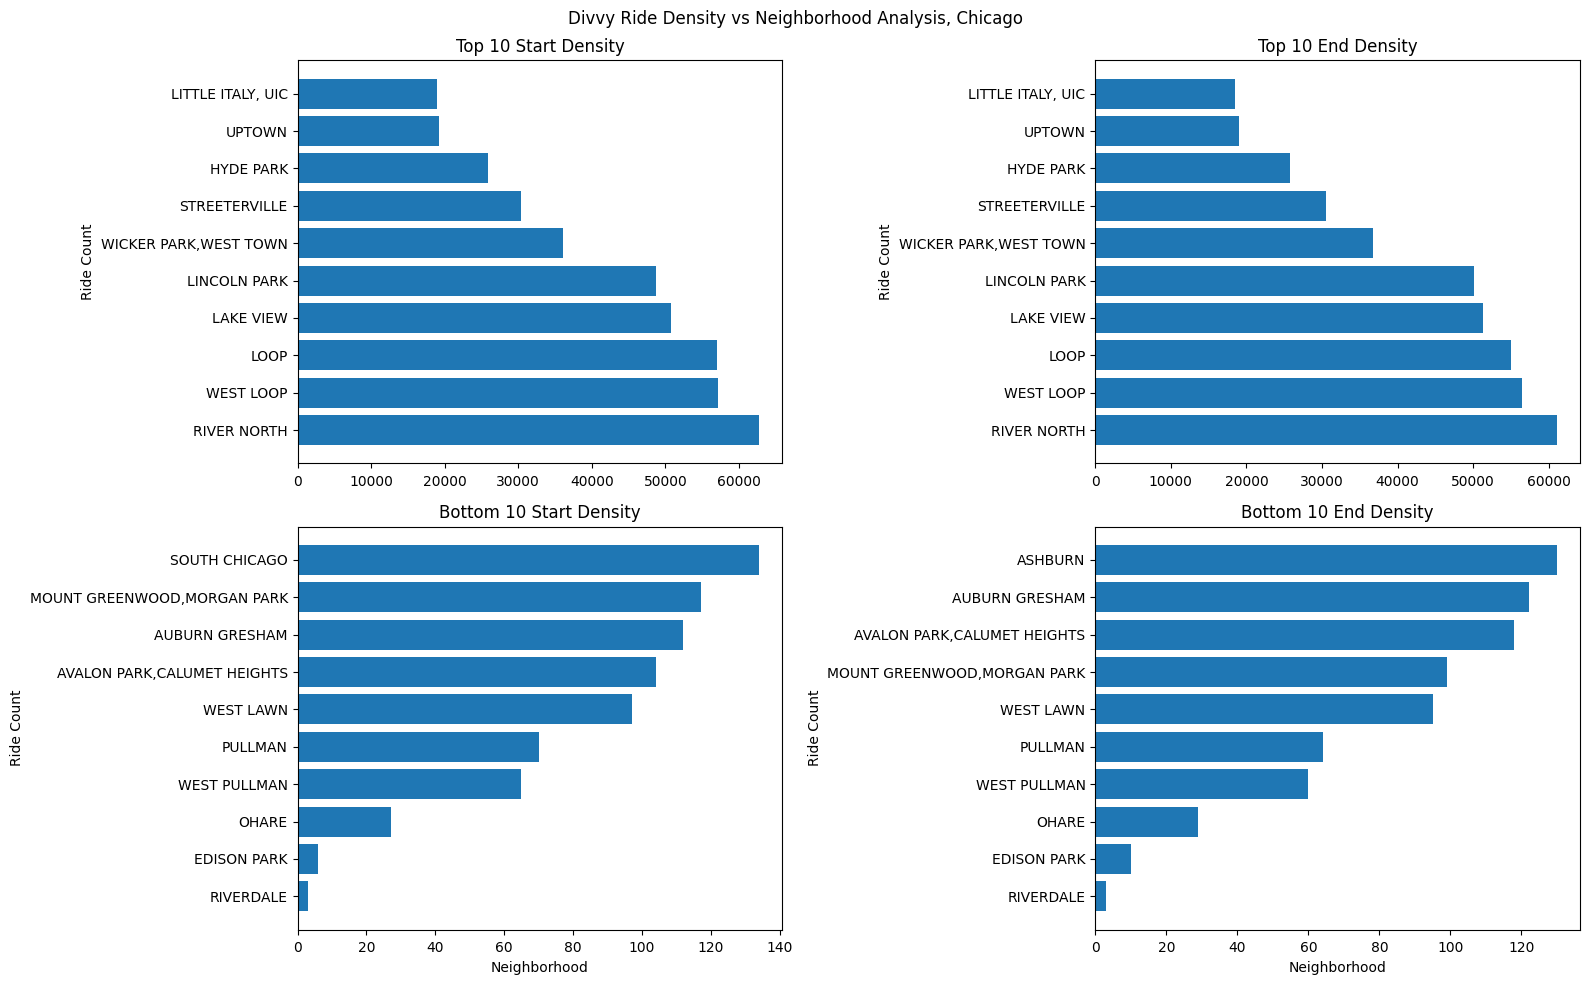

In [ ]:
# top 10 start neighborhoods
start_neigh = cleaned_df.groupby('start_neighborhood').agg(count=('ride_id', 'count')).reset_index()
start_neigh.sort_values(by='count', ascending=False, inplace=True)
top_10_start_neigh = start_neigh.head(10)

# bottom 10 start neighborhoods
start_neigh.sort_values(by='count', ascending=True, inplace=True)
bottom_10_start_neigh = start_neigh.head(10)

# top 10 end neighborhoods
end_neigh = cleaned_df.groupby('end_neighborhood').agg(count=('ride_id', 'count')).reset_index()
end_neigh.sort_values(by='count', ascending=False, inplace=True)
top_10_end_neigh = end_neigh.head(10)

# bottom 10 end neighborhoods
end_neigh.sort_values(by='count', ascending=True, inplace=True)
bottom_10_end_neigh = end_neigh.head(10)

fig, axes = plt.subplots(2,2, figsize=(16,10))

axes[0, 0].barh(top_10_start_neigh['start_neighborhood'], top_10_start_neigh['count'])
axes[0, 0].set_title("Top 10 Start Density")
axes[0, 0].tick_params(axis='x', pad=5)
axes[0, 0].set_ylabel("Ride Count")

axes[0, 1].barh(top_10_end_neigh['end_neighborhood'], top_10_end_neigh['count'])
axes[0, 1].set_title("Top 10 End Density")
axes[0, 1].tick_params(axis='x', pad=5)
axes[0, 1].set_ylabel("Ride Count")

axes[1, 0].barh(bottom_10_start_neigh['start_neighborhood'], bottom_10_start_neigh['count'])
axes[1, 0].set_title("Bottom 10 Start Density")
axes[1, 0].tick_params(axis='x', pad=5)
axes[1, 0].set_xlabel("Neighborhood")
axes[1, 0].set_ylabel("Ride Count")

axes[1, 1].barh(bottom_10_end_neigh['end_neighborhood'], bottom_10_end_neigh['count'])
axes[1, 1].set_title("Bottom 10 End Density")
axes[1, 1].tick_params(axis='x', pad=5)
axes[1, 1].set_xlabel("Neighborhood")
axes[1, 1].set_ylabel("Ride Count")

plt.subplots_adjust(hspace=0.4, wspace=0.25, bottom=0.2)
fig.suptitle('Divvy Ride Density vs Neighborhood Analysis, Chicago')
plt.tight_layout()
plt.show()




## **5) Geospatial Analysis**

In [27]:
# Count rides per neighborhood (START + END)

# Count how many rides START in each neighborhood
start_count = (
    df.groupby("start_neighborhood")
      .size()
      .reset_index(name="count_start")
)

# Count how many rides END in each neighborhood
end_count = (
    df.groupby("end_neighborhood")
      .size()
      .reset_index(name="count_end")
)

# Rename columns so they align for merging
start_count = start_count.rename(columns={"start_neighborhood": "sec_neigh"})
end_count   = end_count.rename(columns={"end_neighborhood": "sec_neigh"})


## **5.1) Data Grouping, Merging, and Aggregation**

In [28]:
# Count rides per neighborhood (START + END)

# Count how many rides START in each neighborhood
start_count = (
    df.groupby("start_neighborhood")
      .size()
      .reset_index(name="count_start")
)

# Count how many rides END in each neighborhood
end_count = (
    df.groupby("end_neighborhood")
      .size()
      .reset_index(name="count_end")
)

# Rename columns so they align for merging
start_count = start_count.rename(columns={"start_neighborhood": "sec_neigh"})
end_count   = end_count.rename(columns={"end_neighborhood": "sec_neigh"})


In [29]:
# Combine start + end counts

density_df = (
    start_count.merge(end_count, on="sec_neigh", how="outer")
               .fillna(0)
)

density_df["total_density"] = (
    density_df["count_start"] + density_df["count_end"]
)

density_df.head()


,sec_neigh,count_start,count_end,total_density
0,ANDERSONVILLE,2252,2285,4537
1,"ARCHER HEIGHTS,WEST ELSDON",271,221,492
2,"ARMOUR SQUARE,CHINATOWN",3510,3648,7158
3,ASHBURN,135,130,265
4,AUBURN GRESHAM,112,122,234


In [30]:
# Attach density counts to the neighborhood polygons
chi_density = chi_neighborhood.merge(
    density_df,
    on="sec_neigh",
    how="left"
)

chi_density["total_density"] = chi_density["total_density"].fillna(0)

chi_density.head()


,:id,:version,:created_at,:updated_at,pri_neigh,sec_neigh,shape_area,shape_len,geometry,count_start,count_end,total_density
0,row-4fxa-3c8r_bu6g,rv-a63d.7j6e~vwnn,2015-12-02 17:43:36.929000+00:00,2015-12-02 17:43:36.929000+00:00,Grand Boulevard,BRONZEVILLE,48492503.1554,28196.837157,"MULTIPOLYGON (((-87.60671 41.81681, -87.6067 4...",3606.0,3618.0,7224.0
1,row-vpnw~gzt3-rt75,rv-rsmh_pwu2.fxbg,2015-12-02 17:43:36.929000+00:00,2015-12-02 17:43:36.929000+00:00,Printers Row,PRINTERS ROW,2162137.97139,6864.247156,"MULTIPOLYGON (((-87.62761 41.87437, -87.6276 4...",4428.0,4620.0,9048.0
2,row-t44k-9bjd-m2xm,rv-gmsv_wtz8.wut5,2015-12-02 17:43:36.929000+00:00,2015-12-02 17:43:36.929000+00:00,United Center,UNITED CENTER,32520512.7053,23101.363745,"MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ...",3201.0,3099.0,6300.0
3,row-dxyq_9ih6~5gze,rv-zg9b-y3ks~cgzv,2015-12-02 17:43:36.929000+00:00,2015-12-02 17:43:36.929000+00:00,Sheffield & DePaul,SHEFFIELD & DEPAUL,10482592.2987,13227.049745,"MULTIPOLYGON (((-87.65833 41.92166, -87.65835 ...",12988.0,13110.0,26098.0
4,row-acmz~h3vq.n8j2,rv-f23t-kvtd_fi4z,2015-12-02 17:43:36.929000+00:00,2015-12-02 17:43:36.929000+00:00,Humboldt Park,HUMBOLDT PARK,125010425.593,46126.751351,"MULTIPOLYGON (((-87.7406 41.88782, -87.7406 41...",3682.0,3918.0,7600.0


In [31]:
# centroid computation 

chi_proj = chi_neighborhood.to_crs(3857)       # project to planar CRS
centroids = chi_proj.geometry.centroid         # compute centroids
centroids_ll = centroids.to_crs(4326)          # convert to lat/lon

chi_density["latitude"] = centroids_ll.y
chi_density["longitude"] = centroids_ll.x


## **5.3) Divvy Ride Density Heatmap (Chicago)**

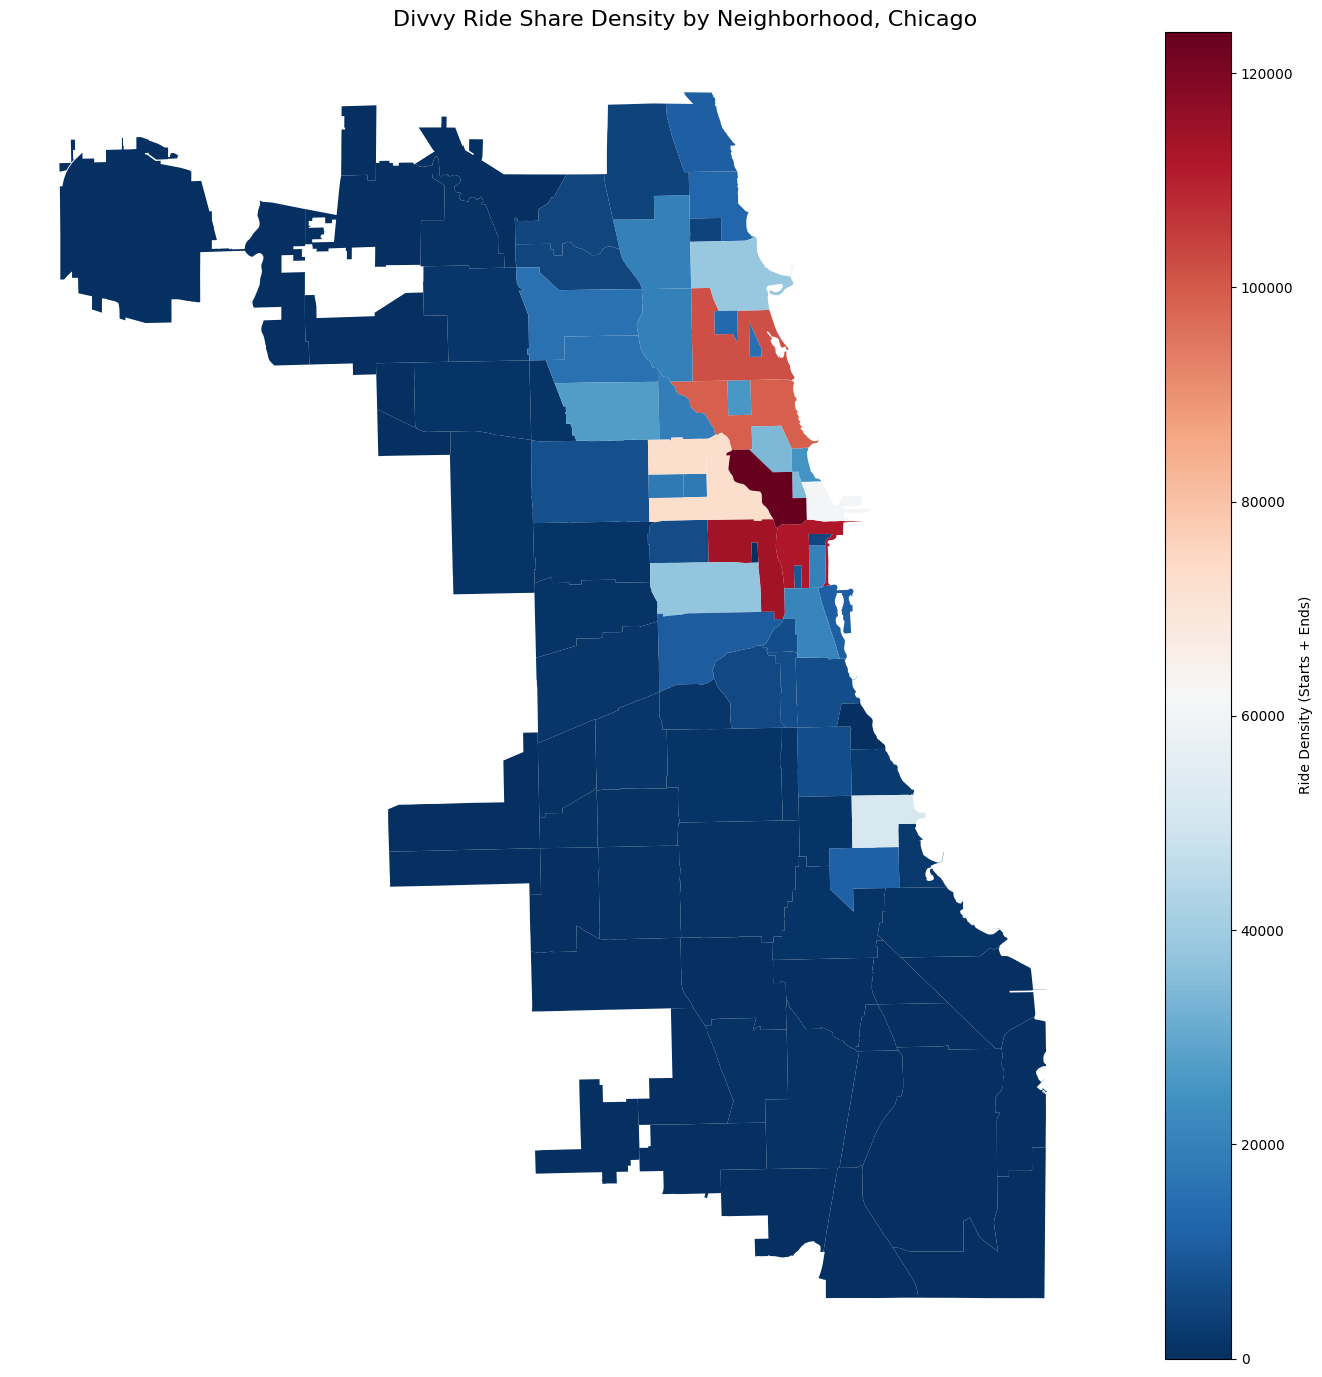

In [32]:
# Plot the heatmap
fig, ax = plt.subplots(figsize=(14, 14))
fig.suptitle("Divvy Ride Share Density by Neighborhood, Chicago", fontsize=16)

chi_density.plot(
    ax=ax,
    column="total_density",
    cmap="RdBu_r",
    legend=True,
    legend_kwds={"label": "Ride Density (Starts + Ends)"}
)

ax.set_axis_off()
plt.tight_layout()
plt.show()


## **6) Loading Income Dataset**

In [33]:
# reading the final dataset to map income to each neighborhood
neigh_income = pd.read_csv('/Users/willoricch/Desktop/chicago-neighborhood-income.csv', skiprows=[1,2,3,4])
neigh_income.drop(columns=['Layer','GEOID','INC_2019-2023_moe'], inplace=True)


## **6.1) Cleaning Income Dataset**

In [34]:
# renaming the cols to match when merging
neigh_income.rename(columns={'Name': 'neighborhood', 'INC_2019-2023': 'income'}, inplace=True)
neigh_income['neighborhood'] = neigh_income['neighborhood'].str.strip().str.upper()
neigh_income

,neighborhood,income
0,ROGERS PARK,58876.167675
1,NORWOOD PARK,111519.346147
2,JEFFERSON PARK,95955.590483
3,FOREST GLEN,142351.108879
4,NORTH PARK,68943.202264
...,...,...
72,MORGAN PARK,76704.655447
73,O'HARE,75466.653762
74,EDGEWATER,74954.650087
75,NEAR NORTH SIDE,127996.482422


In [35]:
# making a full dataset with a total count of divvy's to combine with the income dataset
full_df = pd.merge(start_neigh, end_neigh, how='outer', left_on='start_neighborhood', right_on='end_neighborhood')
full_df.rename(columns={'count_x': 'start_count', 'count_y': 'end_count'}, inplace=True)
full_df['total_count'] = full_df['start_count'] +full_df['end_count']
full_df.drop(columns=['end_neighborhood'], inplace=True)
full_df

,start_neighborhood,start_count,end_count,total_count
0,ANDERSONVILLE,2252,2285,4537
1,"ARCHER HEIGHTS,WEST ELSDON",271,221,492
2,"ARMOUR SQUARE,CHINATOWN",3510,3648,7158
3,ASHBURN,135,130,265
4,AUBURN GRESHAM,112,122,234
...,...,...,...,...
72,WEST PULLMAN,65,60,125
73,WEST RIDGE,2322,2445,4767
74,"WICKER PARK,WEST TOWN",36124,36696,72820
75,WOODLAWN,5550,5600,11150


In [36]:
# renaming cols for clarity
full_df.rename(columns={'start_neighborhood':'neighborhood'}, inplace=True)
full_df

,neighborhood,start_count,end_count,total_count
0,ANDERSONVILLE,2252,2285,4537
1,"ARCHER HEIGHTS,WEST ELSDON",271,221,492
2,"ARMOUR SQUARE,CHINATOWN",3510,3648,7158
3,ASHBURN,135,130,265
4,AUBURN GRESHAM,112,122,234
...,...,...,...,...
72,WEST PULLMAN,65,60,125
73,WEST RIDGE,2322,2445,4767
74,"WICKER PARK,WEST TOWN",36124,36696,72820
75,WOODLAWN,5550,5600,11150


## **6.2) Combining Cleaned Datasets** 

- Since my full_df and income_df have slightly different neighborhood names I had to use some AI assistance in renaming some of the neighborhoods in the income dataframe

In [37]:
# attempting to find the neighborhoods that didn't match
income_map = dict(zip(neigh_income['neighborhood'], neigh_income['income']))

# making sure there are not any dups
def compute_avg_income(cluster_name):
    parts = [p.strip() for p in cluster_name.split(',')]
    incomes = []
    for p in parts:
        if p in income_map:
            incomes.append(income_map[p])
    if len(incomes) == 0:
        return None
    return sum(incomes) / len(incomes)

full_df['income'] = full_df['neighborhood'].apply(compute_avg_income)


In [38]:
# renaming the neighborhoods so they match
cluster_to_ca = {
    'ANDERSONVILLE': ['EDGEWATER'],
    'BACK OF THE YARDS': ['NEW CITY'],
    'BOYSTOWN': ['LAKE VIEW'],
    'BRONZEVILLE': ['DOUGLAS'],
    'BUCKTOWN': ['LOGAN SQUARE'],
    'GARFIELD PARK': ['EAST GARFIELD PARK', 'WEST GARFIELD PARK'],
    'GOLD COAST': ['NEAR NORTH SIDE'],
    'GRANT PARK': ['LOOP'],
    'JACKSON PARK': ['WOODLAWN'],
    'LITTLE ITALY, UIC': ['NEAR WEST SIDE'],
    'LITTLE VILLAGE': ['SOUTH LAWNDALE'],
    'MIDWAY AIRPORT': ['GARFIELD RIDGE'],
    'MILLENIUM PARK': ['LOOP'],
    'MUSEUM CAMPUS': ['NEAR SOUTH SIDE'],
    "O'HARE": ["O'HARE"],
    'OLD TOWN': ['NEAR NORTH SIDE'],
    'PRINTERS ROW': ['LOOP'],
    'RIVER NORTH': ['NEAR NORTH SIDE'],
    'RUSH & DIVISION': ['NEAR NORTH SIDE'],
    'SHEFFIELD & DEPAUL': ['LINCOLN PARK'],
    'SOUTHEAST SIDE': ['SOUTH DEERING'],
    'STREETERVILLE': ['NEAR NORTH SIDE'],
    'UKRAINIAN VILLAGE AND EAST VILLAGE': ['WEST TOWN'],
    'UNITED CENTER': ['NEAR WEST SIDE'],
    'WEST LOOP': ['NEAR WEST SIDE'],
    'WRIGLEYVILLE': ['LAKE VIEW'],
}

# creating a function to map it
def lookup_income(cluster_name):
    if pd.notna(full_df.loc[full_df['neighborhood'] == cluster_name, 'income']).values[0]:
        return full_df.loc[full_df['neighborhood'] == cluster_name, 'income'].values[0]

    if cluster_name in cluster_to_ca:
        ca_list = cluster_to_ca[cluster_name]
        incomes = [neigh_income.loc[neigh_income['neighborhood'] == ca, 'income'].values[0] for ca in ca_list]
        return sum(incomes) / len(incomes)

    return None

full_df['income'] = full_df['neighborhood'].apply(lookup_income)



In [39]:
# since o'hare was the only one that didn't map, I hard coded it 
ohare_income = neigh_income[neigh_income['neighborhood'].str.contains('HARE', case=False)]['income'].iloc[0]
full_df.loc[full_df['neighborhood'].str.contains('HARE', case=False), 'income'] = ohare_income


In [40]:
# finding the correlation between divvy count and income
full_df['total_count'].corr(full_df['income'])

np.float64(0.5083782834042897)

- Since the correlation was roughly 0.51, we can say there is a moderate to strong correlation between the two 

In [41]:
# assigning a general region to each neighborhood
def assign_region_simple(name):
    name = name.upper()

    # NORTH
    if any(k in name for k in [
        "ANDERSONVILLE", "BELMONT", "HERMOSA", "LINCOLN", 
        "LAKE VIEW", "WRIGLEYVILLE", "EDISON PARK", "NORWOOD",
        "MONTCLARE", "GALEWOOD", "DUNNING", "PORTAGE PARK",
        "OLD TOWN", "UPTOWN", "EDGEWATER", "IRVING PARK", 
        "ALBANY PARK", "AVONDALE"
    ]):
        return "North"

    # WEST
    if any(k in name for k in [
        "WEST TOWN", "BUCKTOWN", "WICKER PARK", "HUMBOLDT",
        "GARFIELD PARK", "LAWNDALE", "UKRAINIAN", "UNITED CENTER",
        "RUSH & DIVISION"
    ]):
        return "West"

    if any(k in name for k in [
        "LOOP", "RIVER NORTH", "STREETERVILLE", "GOLD COAST",
        "PRINTERS ROW", "GRANT PARK", "MILLENIUM", "MUSEUM CAMPUS",
        "OLD TOWN" 
    ]):
        return "Central"

    # SOUTH
    if any(k in name for k in [
        "ASHBURN", "AUBURN GRESHAM", "BEVERLY", "WASHINGTON PARK",
        "BRONZEVILLE", "CHATHAM", "BURNSIDE", "HYDE PARK",
        "KENWOOD", "OAKLAND", "WOODLAWN", "GRAND CROSSING",
        "ENGLEWOOD", "WEST ENGLEWOOD", "CALUMET", "AVALON",
        "MOUNT GREENWOOD", "MORGAN PARK", "ROSELAND",
        "RIVERDALE", "SOUTH SHORE", "JACKSON PARK",
        "LITTLE VILLAGE", "MARQUETTE PARK", "GAGE PARK",
        "BACK OF THE YARDS"
    ]):
        return "South"

    # SOUTHWEST
    if any(k in name for k in [
        "ARCHER HEIGHTS", "WEST ELSDON", "WEST LAWN",
        "MIDWAY", "GARFIELD RIDGE", "CLEARING"
    ]):
        return "South"

    # NORTHWEST / FAR NORTH
    if any(k in name for k in [
        "O'HARE", "OHARE"
    ]):
        return "North"

    return None



full_df['region'] = full_df['neighborhood'].apply(assign_region_simple)





In [42]:
# manually mapping/overriding the regions that didn't map initially
region_overrides = {
    "ARMOUR SQUARE,CHINATOWN": "South",
    "AUSTIN": "West",
    "BOYSTOWN": "North",
    "BRIDGEPORT": "South",
    "BRIGHTON PARK,MCKINLEY PARK": "South",
    "JEFFERSON PARK": "North",
    "LITTLE ITALY, UIC": "West",
    "LOGAN SQUARE": "North",
    "LOWER WEST SIDE": "West",
    "NEAR SOUTH SIDE": "Central",
    "NORTH CENTER": "North",
    "PULLMAN": "South",
    "ROGERS PARK": "North",
    "SAUGANASH,FOREST GLEN": "North",
    "SHEFFIELD & DEPAUL": "North",
    "SOUTH CHICAGO": "South",
    "SOUTHEAST SIDE": "South",
    "WEST PULLMAN": "South",
    "WEST RIDGE": "North",
}

mask = full_df['region'].isna()
full_df.loc[mask, 'region'] = (
    full_df.loc[mask, 'neighborhood'].map(region_overrides)
)


In [43]:
# displaying the dataset
full_df


,neighborhood,start_count,end_count,total_count,income,region
0,ANDERSONVILLE,2252,2285,4537,74954.650087,North
1,"ARCHER HEIGHTS,WEST ELSDON",271,221,492,68955.603238,South
2,"ARMOUR SQUARE,CHINATOWN",3510,3648,7158,44802.359552,South
3,ASHBURN,135,130,265,82939.167663,South
4,AUBURN GRESHAM,112,122,234,47086.709934,South
...,...,...,...,...,...,...
72,WEST PULLMAN,65,60,125,49571.298431,South
73,WEST RIDGE,2322,2445,4767,73519.807165,North
74,"WICKER PARK,WEST TOWN",36124,36696,72820,138827.889935,West
75,WOODLAWN,5550,5600,11150,39290.666902,South


## **6.3) Income vs Divvy Usage Scatterplots**

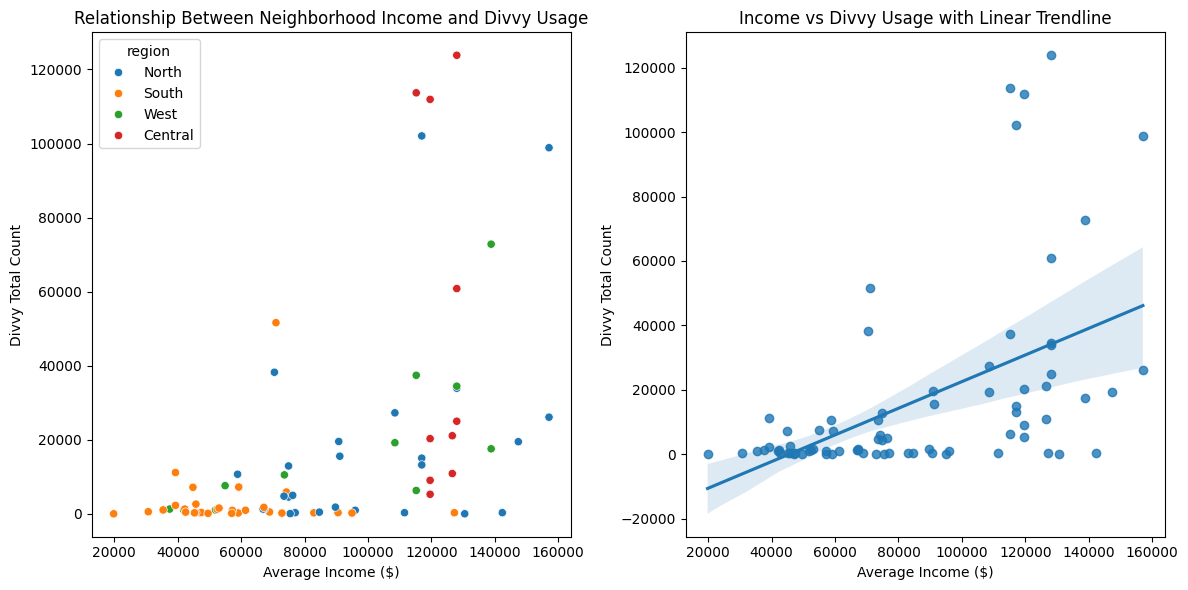

In [44]:
# creating a subplot with a region vs income scatter plot and linear trendline
fig, axes = plt.subplots(1,2, figsize=(12,6))

axes[0].set_title('Relationship Between Neighborhood Income and Divvy Usage')
sns.scatterplot(data=full_df, x='income', y='total_count', hue='region', ax=axes[0])
axes[0].set_xlabel('Average Income ($)')
axes[0].set_ylabel("Divvy Total Count")

axes[1].set_title("Income vs Divvy Usage with Linear Trendline")
sns.regplot(data=full_df, x='income', y='total_count', ax=axes[1])
axes[1].set_xlabel("Average Income ($)")
axes[1].set_ylabel("Divvy Total Count")



plt.tight_layout()
plt.show()

## **6.5) Regional Usage Pattern Scatterplot (Facet Grid)**

Text(0.5, 1.05, 'Divvy Usage Patterns Across Chicago Regions by Income Level')

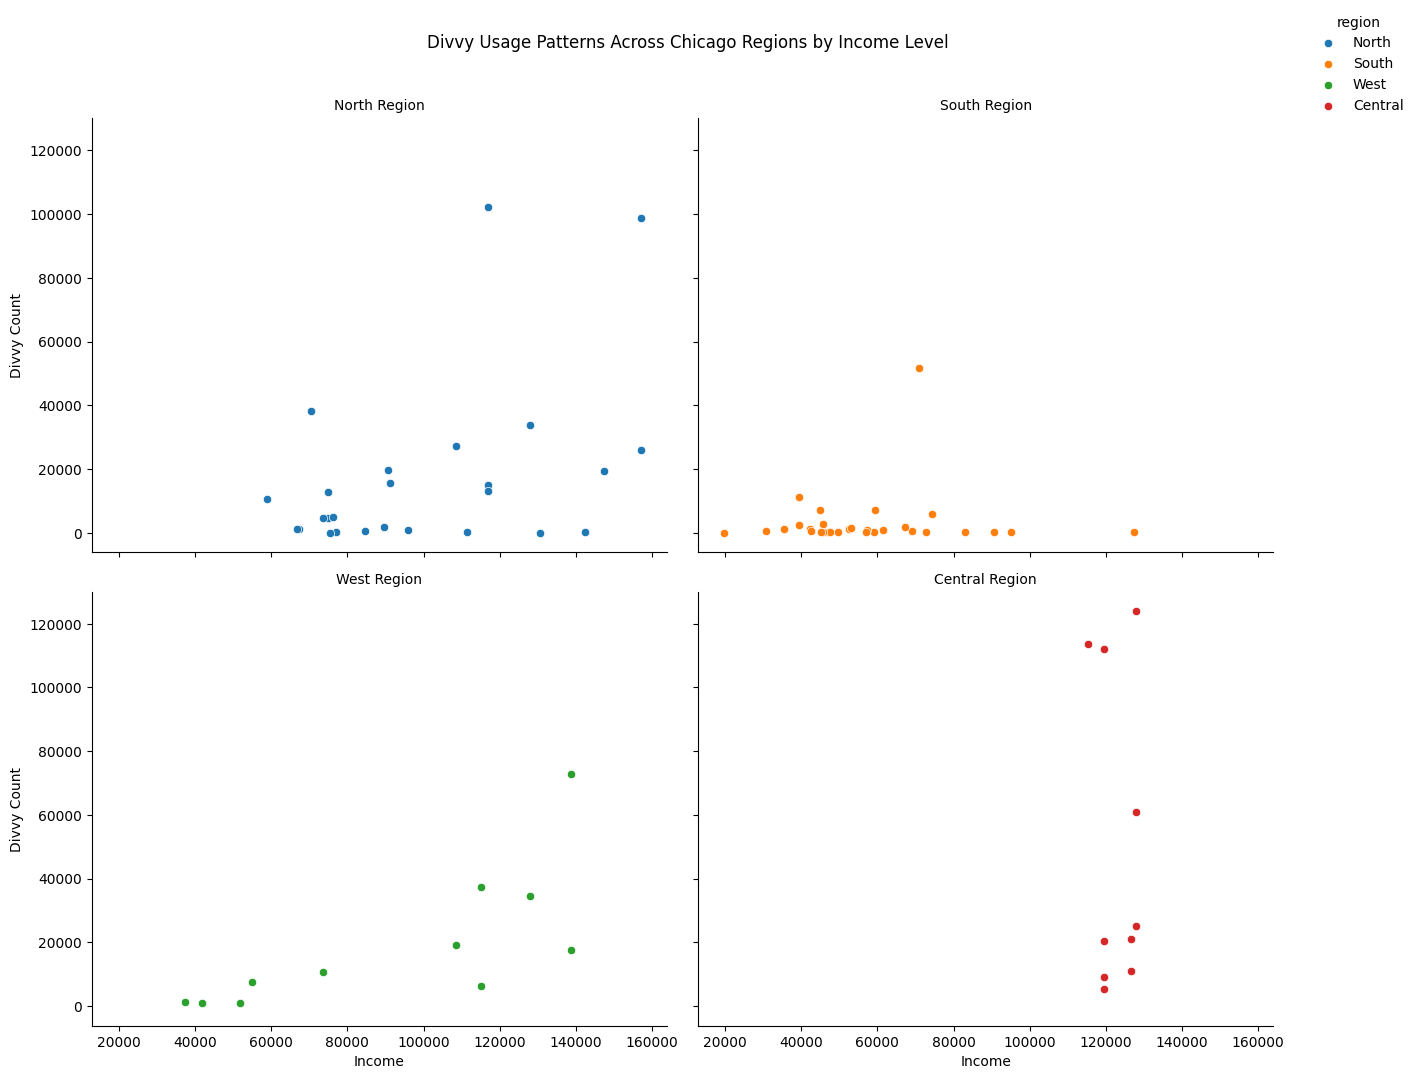

In [45]:
# visually showing the subplot from above

g = sns.FacetGrid(full_df, col="region", hue="region", col_wrap=2, height=5, aspect=1.3)
g.map_dataframe(sns.scatterplot, x="income", y="total_count")
g.set_titles("{col_name} Region")
g.set_axis_labels("Income", "Divvy Count")
g.add_legend(bbox_to_anchor=(1.02,1.02))

plt.suptitle('Divvy Usage Patterns Across Chicago Regions by Income Level', y=1.05)



## **7) Key Insights & Recommendations**

### **Key Insights**
- **Divvy usage is highly concentrated in central and higher-income neighborhoods**, with significantly lower activity in many South and West Side regions.  
- **A positive relationship exists between median household income and total ride count**, suggesting that access and bike availability may disproportionately benefit higher-income communities.  
- **Geospatial heatmaps reveal clear regional clustering**, with downtown and North Side neighborhoods showing the highest ride density.  
- **Regional facet plots show distinct usage patterns by zone**, reinforcing that location-based factors heavily influence ridership behavior.

### **Recommendations**
- **Increase bike availability and docking infrastructure in underserved neighborhoods** to improve accessibility and encourage ridership.  
- **Partner with city planners to target transportation equity gaps**, focusing on South and West Side communities identified in the analysis.  
- **Pilot pricing or incentive programs in lower-income areas** to promote adoption and reduce cost barriers.  
- **Conduct further analysis using time-based features (hour, day, season)** to optimize resource allocation throughout the year.

---

Overall, the analysis highlights meaningful disparities in Divvy bike usage across Chicago and identifies opportunities to improve transportation equity through infrastructure planning and targeted community initiatives